In [1]:
import pandas as pd
import csv
import os
import numpy as np

### Merge and process data 

In [7]:
DATASET_PATH_1 = "./dataset/raw/ielts_writing_dataset_2.csv"
DATASET_PATH_2 = "./dataset/raw/ielts-writing-essays.csv"
DATASET_PATH_3 = "./dataset/raw/train.csv"
DATASET_PATH_4 = "./dataset/raw/test.csv"
DATASET_PATH_5 = "./dataset/raw/train (1).csv"
DATASET_PATH_6 = "./dataset/raw/test (1).csv"

In [48]:
# read from the csv files
# format 1
df_1 = pd.read_csv(DATASET_PATH_1)
# df_2 = pd.read_csv(DATASET_PATH_2)

# format 2
df_3 = pd.read_csv(DATASET_PATH_3)
df_4 = pd.read_csv(DATASET_PATH_4)
df_5 = pd.read_csv(DATASET_PATH_5)
df_6 = pd.read_csv(DATASET_PATH_6)

# handle format 1 and remove those with Task_Type == 1
df_1 = df_1[df_1["Task_Type"] != 1]
df_1 = df_1[["Question", "Essay", "Overall"]]
df_1.columns = ['prompt','essay', 'band']

# handle format 2
concat_df = pd.concat([df_3[['prompt', 'essay', 'band']],
                             df_4[['prompt', 'essay', 'band']],
                             df_5[['prompt', 'essay', 'band']],
                             df_6[['prompt', 'essay', 'band']]], 
                             axis=0, ignore_index=True)

# remove potential prompt that belongs to task
keyword = ["diagram", "diagrams", "table", "tables", "graph", "graphs",
           "chart", "charts", "image", "images"]

# Citation: ChatGPT, response to author query. OpenAI [Online]. https://chatgpt.com/
# ------------- Citation begins here ---------
concat_df = concat_df[~concat_df["prompt"].str.contains('|'.join(keyword), case=False, na=False)]
# ------------- Citation ends here ---------


# remove newline and return characters
concat_df['band'] = concat_df['band'].str.replace(r'[\n\r]+', '', regex=True)


df_all = pd.concat([df_1, concat_df], axis=0, ignore_index=True)
df_all.drop_duplicates(subset=['essay'], keep='first', inplace=True)

def int_2_float(val):
    try:
        val = float(val)
        return f"{val:.1f}"
    except ValueError:
        return str(val)
    
def below_4_conversion(val):
    try:
        if float(val) < 4.0:
            return "<4"
        else:
             return val
    except (TypeError, ValueError):
            return str(val)


df_all['band'] = df_all['band'].apply(int_2_float)

# convert those labels smaller than 4.0 to <4 (str)
df_all["band"] = df_all['band'].apply(below_4_conversion)

print("********** SUMMARY ****************")
print(f"TOTAL NUMBER OF RECORDS: {len(df_all)}")

********** SUMMARY ****************
TOTAL NUMBER OF RECORDS: 9766


In [49]:
print(df_all)

                                                  prompt  \
0      Rich countries often give money to poorer coun...   
1      Rich countries often give money to poorer coun...   
2      Some countries achieve international sports by...   
3      Some countries achieve international sports by...   
4      Some countries achieve international sports by...   
...                                                  ...   
16468  Some people think that in the modern world we ...   
16469  Some people think that in the modern world we ...   
16470  Some people think that in the morden world we ...   
16471  Some people think that in the modern world we ...   
16472  Some people think that in the modern world we ...   

                                                   essay band  
0      Poverty represents a worldwide crisis. It is t...  6.5  
1      Human beings are facing many challenges nowada...  5.5  
2      Whether countries should only invest facilitie...  6.5  
3      Sports is an ess

In [50]:
EXPORT_PATH = './dataset/processed/clean_data.csv'
df_all.to_csv(EXPORT_PATH, index=False, header=["prompt", "essay", 'band'], mode='w')

### Plot the distribution of all data

In [51]:
np_band = np.array(df_all['band'])
print(set(np_band))
dist_dict = dict()

keys = [str(key) for key in np.arange(4.0, 9.5, 0.5)]
keys.insert(0,'<4')

# init the dictionary
for i in keys:
    dist_dict[i] = 0

for i in np_band:
    dist_dict[i] += 1



{'8.5', '7.0', '9.0', '4.5', '8.0', '6.5', '6.0', '5.0', '7.5', '<4', '4.0', '5.5'}


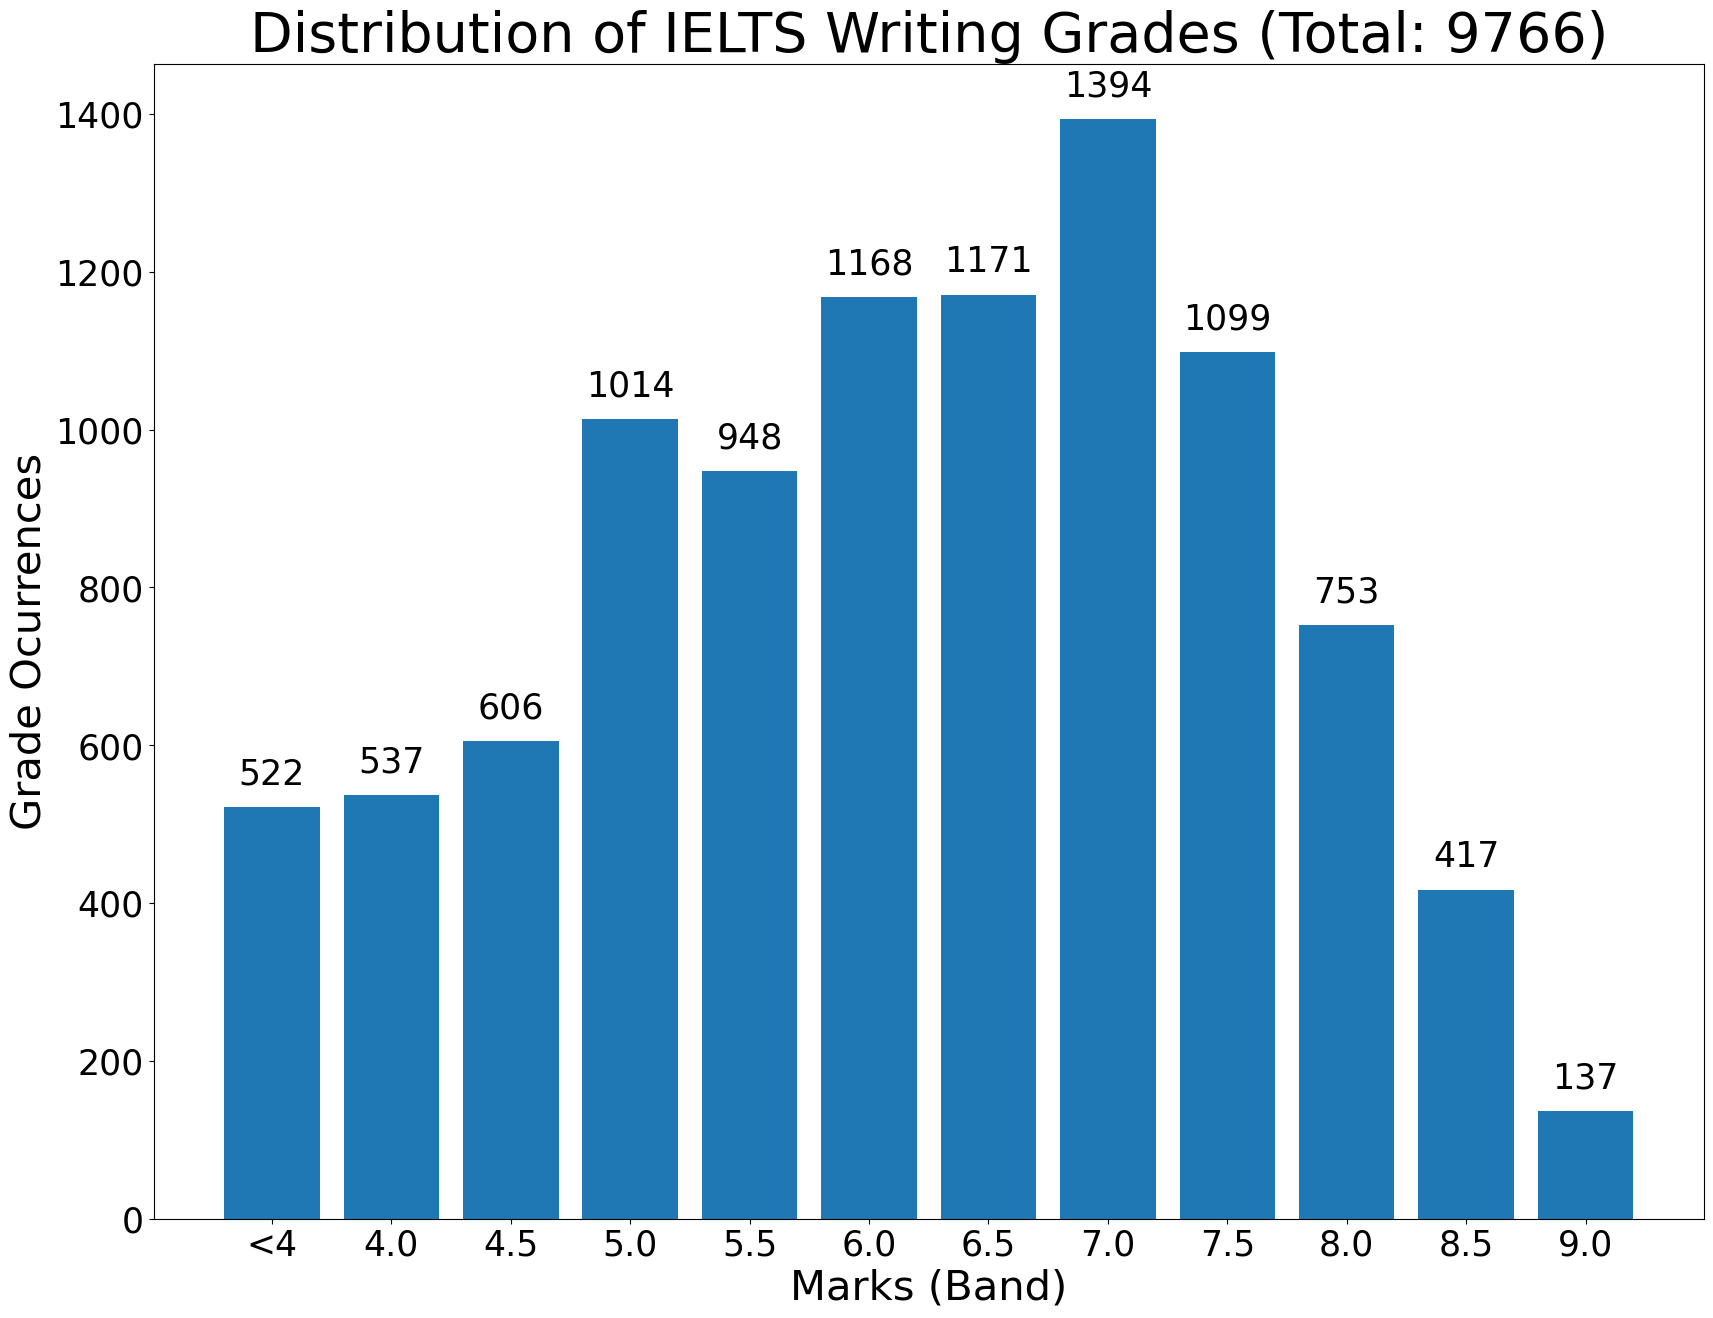

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
plt.title(f"Distribution of IELTS Writing Grades (Total: {len(df_all)})", fontsize=40)
bars = plt.bar(list(dist_dict.keys()), list(dist_dict.values()))


# Citation: ChatGPT, response to author query. OpenAI [Online]. https://chatgpt.com/
# ------------- Citation begins here ---------
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 20, int(y), ha='center', va='bottom', fontsize=25)
# ------------- Citation ends here ---------

plt.xlabel('Marks (Band)', fontsize=30)
plt.ylabel('Grade Ocurrences', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig("./dataset/distribution_of_grade.png")
plt.show()